# Importing libraries

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Read in the dataset

In [150]:
df = pd.read_csv("../Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [152]:
df.shape

(7043, 21)

# Cleaning and preprocessing

In [153]:
df.drop('customerID', axis=1,inplace=True)
df.head(2)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [154]:
df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [155]:
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

Churn
No     5163
Yes    1869
Name: count, dtype: int64


Text(0.5, 1.0, 'Churn Distribution')

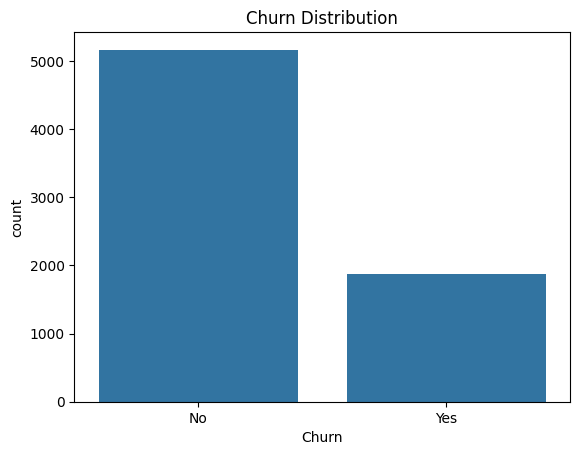

In [156]:
#Churn distribution
print(df['Churn'].value_counts())
sns.countplot(x='Churn',data=df)

plt.title("Churn Distribution")

In [157]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

Text(0.5, 1.0, 'Tenure of Churned vs Non-Churned Distribution')

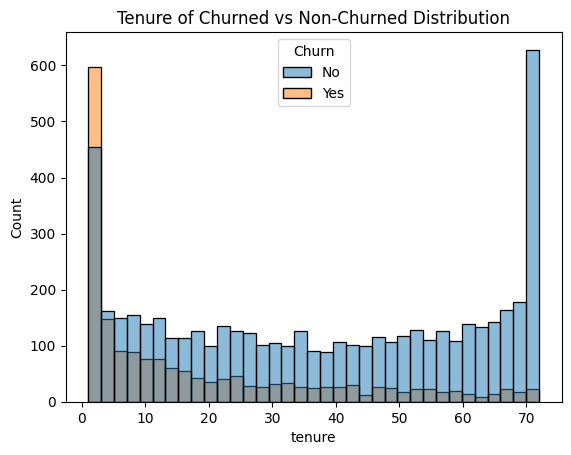

In [158]:
#Tenure vs Churn
sns.histplot(data=df, x='tenure',hue='Churn',bins=35)
plt.title("Tenure of Churned vs Non-Churned Distribution")

Text(0.5, 1.0, 'Monthly Charges and Churn')

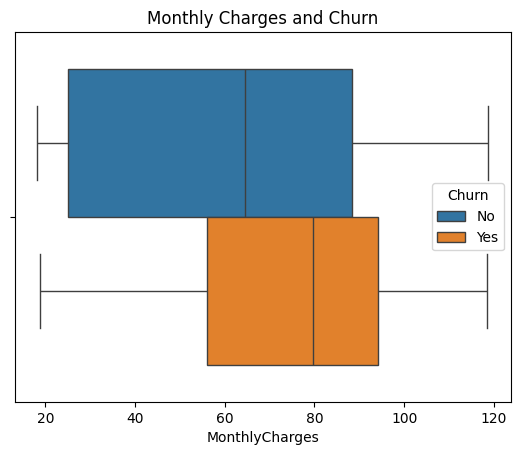

In [159]:
#Monthly Charges vs Churn
sns.boxplot(data=df, x='MonthlyCharges', hue='Churn')
plt.title("Monthly Charges and Churn")


Text(0.5, 1.0, 'Churn rate by Contract Type')

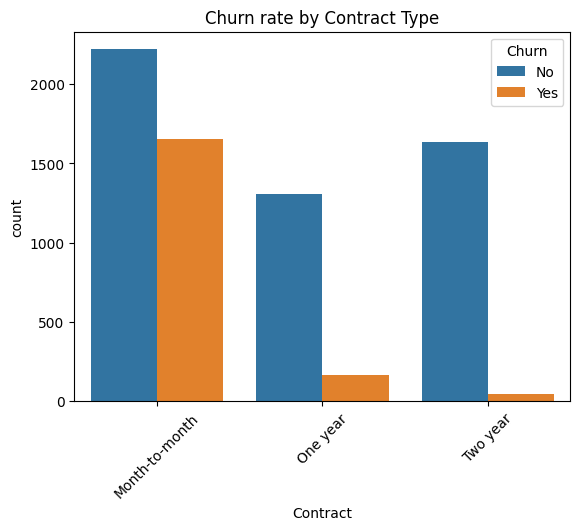

In [160]:
#Contract type vs churn
sns.countplot(data=df, x = 'Contract', hue = 'Churn')
plt.xticks(rotation=45)
plt.title("Churn rate by Contract Type")

Text(0.5, 1.0, 'Correlation Analysis on Numeric Features')

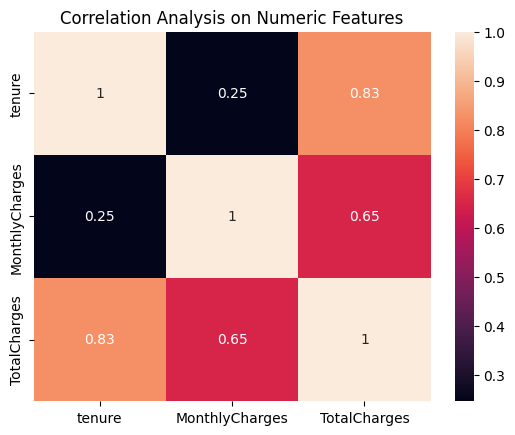

In [161]:
#Correlation analysis
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
numvalues = df.select_dtypes(include=['int64','float64'])
sns.heatmap(numvalues.corr(),annot=True)
plt.title('Correlation Analysis on Numeric Features')

# Predictive Model

In [162]:
#encode categorical variables
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

print(df_encoded.head(10))


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   
5       0              0        0           0       8             1   
6       1              0        0           1      22             1   
7       0              0        0           0      10             0   
8       0              0        1           0      28             1   
9       1              0        0           1      62             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0 

In [163]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [164]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1300
           1       0.61      0.53      0.57       458

    accuracy                           0.79      1758
   macro avg       0.73      0.71      0.71      1758
weighted avg       0.78      0.79      0.79      1758

[[1148  152]
 [ 216  242]]


/Users/mendez/Documents/DataAnalysis/.venv/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [165]:

importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.coef_[0]
}).sort_values(by='importance', ascending=False)
importance.head(10)


,feature,importance
1,SeniorCitizen,0.346580
15,PaperlessBilling,0.290537
7,InternetService,0.094711
2,Partner,0.074913
6,MultipleLines,0.058774
13,StreamingMovies,0.030072
17,MonthlyCharges,0.016664
12,StreamingTV,0.007557
18,TotalCharges,0.000434
16,PaymentMethod,-0.004554


# Recommendations

### Top drivers of churn:
- High monthly charges
- Tenure
- Contract type

### Business Actions:
- Encourage annual contracts
- Target customers with tenure < 1 year